# FIRST ATTEMPT TO CNN

The purpose of this first file is to implement a Convolutional Neural Network able to classify the images in the different classes with an accuracy of at least 30%.

Initially, the data must be read and pre-processed. In general it is necessary to convert the images to grayscale and resize the various images to 64x64 pixels.

## Libreries

List of list of libraries used

In [1]:
import os
import glob
import cv2 as cv2
import numpy as np
import keras as ks
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

import import_ipynb
import dataSetUtility as dsu
import plottingUtility as pltu

importing Jupyter notebook from dataSetUtility.ipynb
importing Jupyter notebook from plottingUtility.ipynb


## DATA PREPROCESSING 

In the following cells we construct and prepare the data for CNN. We read all images and resize it.

In [2]:
#path to the directories
pathTrain=r'C:\Users\39320\Desktop\tesi\Computer-Vision-2020-main\ImageSet\train'
pathTest=r'C:\Users\39320\Desktop\tesi\Computer-Vision-2020-main\ImageSet\test'

labels = [os.path.basename(i) for i in glob.glob(pathTrain + '/*', recursive=True)]
numberOfClasses = len(labels)
print("Class number: ", numberOfClasses)
print("Class names: ", labels)

Class number:  12
Class names:  ['171', '178_FORSE', '371', '385_FORSE', '43', '438', '619', '655', '659', '72', '96', 'Grandi']


In [3]:
xTrainRaw, yTrainRaw = dsu.loadImages(pathTrain, labels)
xTest, yTest = dsu.loadImages(pathTest, labels)

print('len train x: ',len(xTrainRaw))
print('len test x: ',len(xTest))
print('len train y: ',len(yTrainRaw))
print('len test y: ',len(yTest))

len train x:  1501
len test x:  309
len train y:  1501
len test y:  309


Convert the labels into a set of numbers to input into the neural net work

In [4]:
yTrainCategorical = to_categorical(yTrainRaw)
yTestCategorical = to_categorical(yTest)

Split the training set into train set (85%) and validation set (15%)

In [5]:
xTrain, xValidation, yTrain, yValidation = train_test_split(xTrainRaw, yTrainCategorical, train_size=0.85, random_state=275)
print('len Train Set: ',len(xTrain))
print('len Validation Set: ',len(xValidation))
print('len Test Set: ',len(xTest))

len Train Set:  1275
len Validation Set:  226
len Test Set:  309


# CNN MODEL

To buil the model we need to create the architecture and add the layer to extract features from the input images. 

In [6]:
sgd = tf.keras.optimizers.SGD(momentum=0.9,nesterov=True)
norm = ks.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
baseModel = Sequential([
    #first convolutional layer
    Conv2D(8, 3,strides=1, padding='valid', activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #second convolutional layer
    Conv2D(16, 3,strides=1, padding='valid',activation='relu'),
    MaxPooling2D(pool_size=2,strides=2),
    
    #third convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu'),
    Flatten(),
    Dense(numberOfClasses, activation='relu',kernel_initializer=norm, bias_initializer='zeros'),
    Dense(numberOfClasses, activation='softmax')
])

baseModel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])


In [7]:
baseModel.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                5

# MODEL TRANING AND TESTING

Now we train our CNN and visualizze the training results. We also implement the earlystopping in order to stop the training before the end of epochs if it is necessary

In [8]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

history=baseModel.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Epoch 1/100
40/40 [==============================] - 2s 30ms/step - loss: 2.3889 - accuracy: 0.2157 - val_loss: 2.2455 - val_accuracy: 0.2389
Epoch 2/100
40/40 [==============================] - 1s 27ms/step - loss: 2.1715 - accuracy: 0.2298 - val_loss: 2.0694 - val_accuracy: 0.2389
Epoch 3/100
40/40 [==============================] - 1s 26ms/step - loss: 2.0083 - accuracy: 0.3137 - val_loss: 1.7968 - val_accuracy: 0.3761
Epoch 4/100
40/40 [==============================] - 1s 27ms/step - loss: 1.6511 - accuracy: 0.4000 - val_loss: 1.4340 - val_accuracy: 0.4558
Epoch 5/100
40/40 [==============================] - 1s 26ms/step - loss: 1.5227 - accuracy: 0.4510 - val_loss: 1.3658 - val_accuracy: 0.4425
Epoch 6/100
40/40 [==============================] - 1s 26ms/step - loss: 1.2489 - accuracy: 0.5388 - val_loss: 1.2787 - val_accuracy: 0.5000
Epoch 7/100
40/40 [==============================] - 1s 27ms/step - loss: 1.1402 - accuracy: 0.5600 - val_loss: 1.1540 - val_accuracy: 0.5442
Epoch 

Valuate the model and predict a classes

In [9]:
baseModel.evaluate(xTest, yTestCategorical)
#predict classes
prediction = baseModel.predict(xTest)

#safe only best class for all prediction 
yPred = dsu.predictClass(prediction)

10/10 [==============================] - 0s 10ms/step - loss: 1.1154 - accuracy: 0.7864


We now obtain the confusion matrix

In [10]:
cm=confusion_matrix(yTest, yPred)

# PLOTTING

In the remaining cells We perform some plots that can be interested to comment

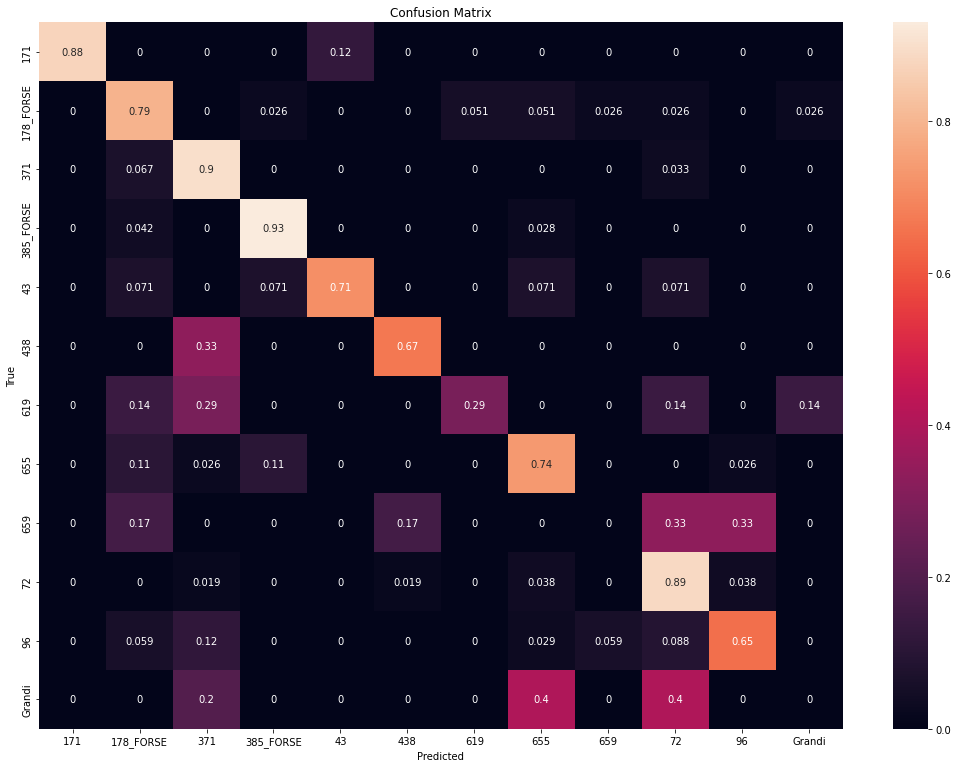

In [11]:
pltu.plotConfusionMatrix(cm, labels, "confusion_matrix_1", "images_point_one/")

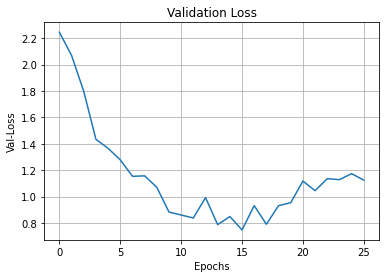

In [12]:
pltu.validationLoss(history, "images_point_one")

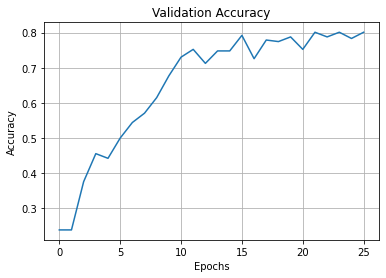

In [13]:
pltu.validationAccuracy(history, "images_point_one")

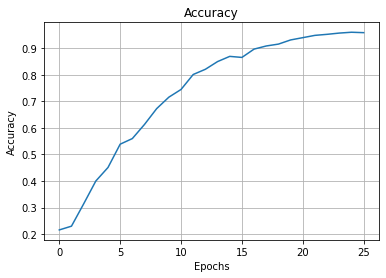

In [14]:
pltu.plottingAccuracy(history, "images_point_one")

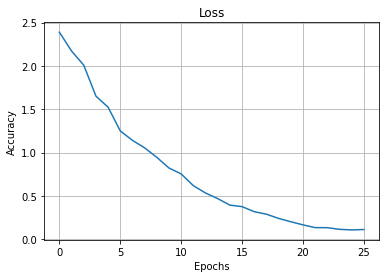

In [15]:
pltu.plottingLoss(history, "images_point_one")

In [16]:
print('Classification Report')
print(classification_report(yTest, yPred, target_names=labels))

Classification Report
              precision    recall  f1-score   support

         171       1.00      0.88      0.93         8
   178_FORSE       0.69      0.79      0.74        39
         371       0.73      0.90      0.81        30
   385_FORSE       0.92      0.93      0.92        72
          43       0.91      0.71      0.80        14
         438       0.50      0.67      0.57         3
         619       0.50      0.29      0.36         7
         655       0.74      0.74      0.74        38
         659       0.00      0.00      0.00         6
          72       0.81      0.89      0.85        53
          96       0.81      0.65      0.72        34
      Grandi       0.00      0.00      0.00         5

    accuracy                           0.79       309
   macro avg       0.63      0.62      0.62       309
weighted avg       0.77      0.79      0.78       309

